# Graph 4: Fatal accidents per age group

This code displays the fatal accidents per age group. First, the data is grouped and cleaned. After that, various plots are generated.

##### import libaries 

In [84]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

##### Preparing data

In [85]:
#importing data 
file_path = 'Overledenen__doden_door_verkeersongeval_in_Nederland__wijze_van_deelname_07102024_121219.csv'
df = pd.read_csv(file_path, sep=';')

# make a nice spreadsheet so you can read it completely
pivot_df = df.pivot(index='Perioden', columns='Leeftijd', values='aantal')

#combine data: 
pivot_df['0 tot 20 jaar'] = pivot_df['15 tot 20 jaar'] + pivot_df['Jonger dan 15 jaar']
pivot_df = pivot_df.drop(['15 tot 20 jaar', 'Jonger dan 15 jaar'], axis=1)
columns = list(pivot_df.columns)  
columns.insert(0, columns.pop(columns.index('0 tot 20 jaar')))
pivot_df = pivot_df[columns]


#show data
display (pivot_df)

Leeftijd,0 tot 20 jaar,20 tot 30 jaar,30 tot 40 jaar,40 tot 50 jaar,50 tot 60 jaar,60 tot 70 jaar,70 tot 80 jaar,80 jaar of ouder,Totaal alle leeftijden
Perioden,,,,,,,,,
1996,56,10,4,14,20,28,70,37,239
1997,62,16,15,23,23,31,54,40,264
1998,41,10,11,12,30,46,37,25,212
1999,60,10,11,18,27,30,40,31,227
2000,50,12,19,15,23,34,51,29,233
2001,37,15,18,20,30,28,48,29,225
2002,41,16,14,16,15,24,38,31,195
2003,36,9,13,12,25,41,47,36,219
2004,33,13,8,14,22,24,37,29,180


##### Making dataframes with the total of accidents and without the total of accidents

In [88]:
#Making dataframe without total
pivot_df_without_total = pivot_df.drop("Totaal alle leeftijden", axis=1)
pivot_df_without_total = pivot_df_without_total.reset_index().melt(id_vars='Perioden', var_name='Leeftijd', value_name='Overledenen')


#Making dataframe with total
pivot_df_with_total = pivot_df.reset_index().melt(id_vars='Perioden', var_name='Leeftijd', value_name='Overledenen')


##### Seaborn 8 graphs per age groups

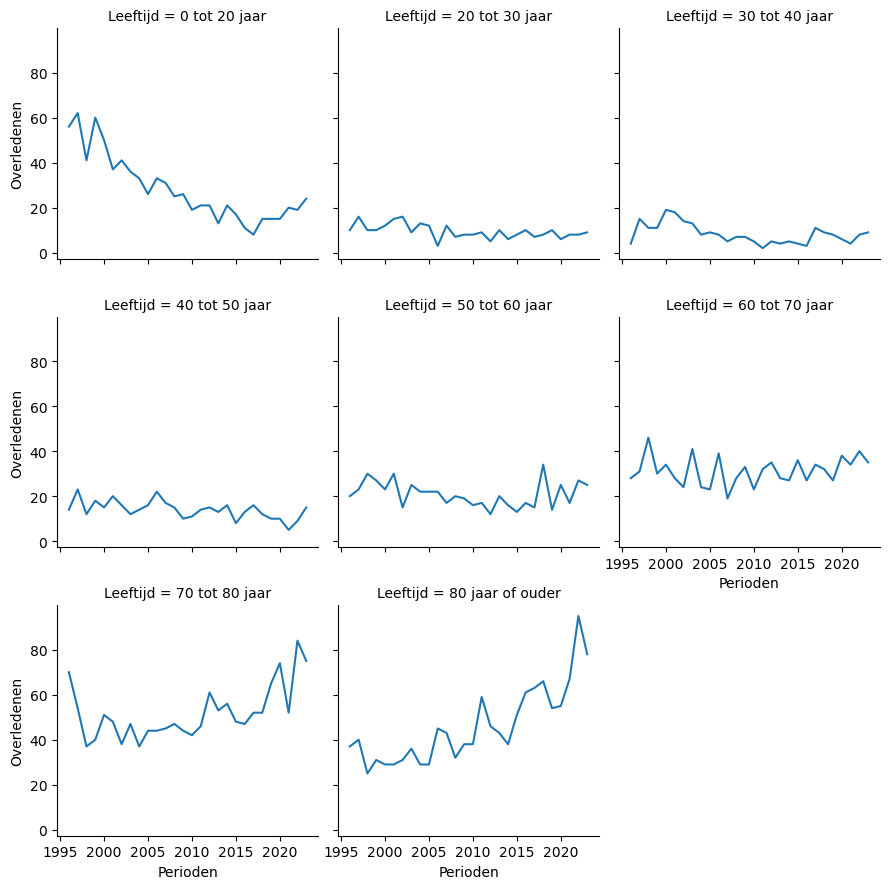

In [90]:
Seaborn_graphs = sns.FacetGrid(pivot_df_without_total, col="Leeftijd", col_wrap=3)
Seaborn_graphs.map(sns.lineplot, "Perioden", "Overledenen")

##### Plot fatal accidents for different age groups

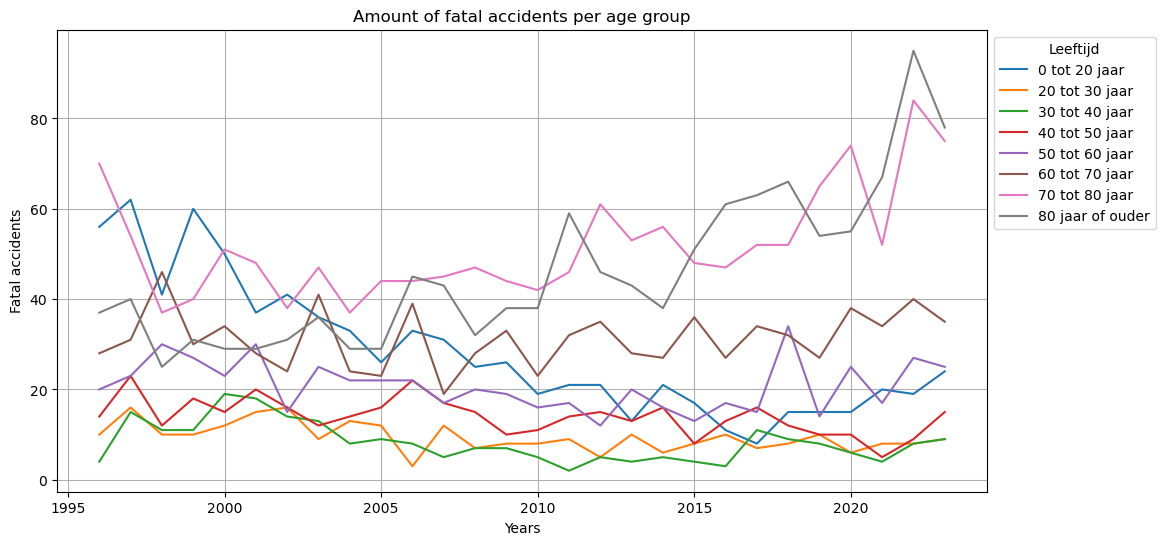

In [94]:
plt.figure(figsize=(12, 6))


sns.lineplot(data=pivot_df_without_total, x='Perioden', y='Overledenen', hue='Leeftijd')

plt.grid()
plt.legend(title='Leeftijd', bbox_to_anchor=(1,1), loc='upper left')
plt.title('Amount of fatal accidents per age group')
plt.xlabel('Years')
plt.ylabel('Fatal accidents')



# Stap 4: Plot weergeven
plt.show()

##### Making an interactive plot

In [102]:
interactive_plot = px.line(pivot_df_with_total, x='Perioden', y='Overledenen', color='Leeftijd',
    title='Amount of fatal accidents per age group',
    labels={'Perioden': 'Jaar', 'Overledenen': 'Aantal overledenen'})

#layout
interactive_plot.update_layout(
    xaxis_title='Year',
    yaxis_title='Amount of fatal accidents',
    legend_title='Ages',
    yaxis=dict(gridcolor='lightgray'),
    xaxis=dict(gridcolor='lightgray'))

interactive_plot.show()